<a href="https://colab.research.google.com/github/lovellbrian/Chollet/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chollet  p105

On the other hand, if the network has limited memorization resources, it won’t be
able to learn this mapping as easily; thus, in order to minimize its loss, it will have to
resort to learning compressed representations that have predictive power regarding
the targets—precisely the type of representations we’re interested in. At the same
time, keep in mind that you should use models that have enough parameters that they
don’t underfit: your model shouldn’t be starved for memorization resources. There is
a compromise to be found between too much capacity and not enough capacity.
Unfortunately, there is no magical formula to determine the right number of layers
or the right size for each layer. You must evaluate an array of different architectures
(on your validation set, not on your test set, of course) in order to find the
correct model size for your data. The general workflow to find an appropriate model
size is to start with relatively few layers and parameters, and increase the size of the layers
or add new layers until you see diminishing returns with regard to validation loss.
Let’s try this on the movie-review classification network. The original network is
shown next.




In [4]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Now let’s try to replace it with this smaller network.

In [5]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Original Model

In [6]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

from keras import models
from keras import layers

# Original model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values_orig = history_dict['val_loss']



<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

Epoch 1/20
30/30 [==============================] - 2s 53ms/step - loss: 0.5828 - acc: 0.7082 - val_loss: 0.3908 - val_acc: 0.8623
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3207 - acc: 0.9042 - val_loss: 0.3185 - val_acc: 0.8750
Epoch 3/20
30/30 [==============================] - 2s 60ms/step - loss: 0.2322 - acc: 0.9277 - val_loss: 0.2804 - val_acc: 0.8884
Epoch 4/20
30/30 [==============================] - 1s 50ms/step - loss: 0.1831 - acc: 0.9430 - val_loss: 0.3034 - val_acc: 0.8777
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1432 - acc: 0.9564 - val_loss: 0.3257 - val_acc: 0.8709
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1218 - acc: 0.9618 - val_loss: 0.2883 - val_acc: 0.8853
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0971 - acc: 0.9732 - val_loss: 0.3033 - val_acc: 0.8846
Epoch 8/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0750 - a

Smaller Model

In [7]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

from keras import models
from keras import layers

# Smaller model
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values_small = history_dict['val_loss']



<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.6479 - acc: 0.6255 - val_loss: 0.5557 - val_acc: 0.7665
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.5288 - acc: 0.8047 - val_loss: 0.5188 - val_acc: 0.7517
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.4664 - acc: 0.8544 - val_loss: 0.4573 - val_acc: 0.8490
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3973 - acc: 0.9061 - val_loss: 0.4006 - val_acc: 0.8725
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3221 - acc: 0.9336 - val_loss: 0.3532 - val_acc: 0.8776
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2542 - acc: 0.9475 - val_loss: 0.3156 - val_acc: 0.8870
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2059 - acc: 0.9557 - val_loss: 0.2959 - val_acc: 0.8875
Epoch 8/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1771 - a

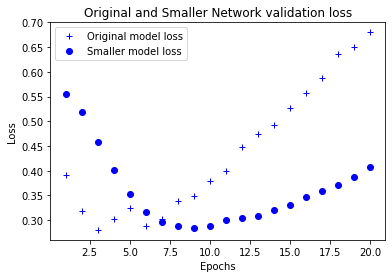

In [10]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
epochs = range(1, len(acc) + 1)
# plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values_orig, 'b+', label='Original model loss')
plt.plot(epochs, val_loss_values_small, 'bo', label='Smaller model loss')
plt.title('Original and Smaller Network validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

As you can see, the smaller network starts overfitting later than the reference network
(after six epochs rather than four), and its performance degrades more slowly once it
starts overfitting.
Now, for kicks, let’s add to this benchmark a network that has much more capacity—
far more than the problem warrants.

In [12]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

from keras import models
from keras import layers

# Smaller model
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values_big = history_dict['val_loss']



<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

Epoch 1/20
30/30 [==============================] - 10s 299ms/step - loss: 0.6526 - acc: 0.6600 - val_loss: 0.3336 - val_acc: 0.8702
Epoch 2/20
30/30 [==============================] - 9s 287ms/step - loss: 0.2493 - acc: 0.9061 - val_loss: 0.2777 - val_acc: 0.8892
Epoch 3/20
30/30 [==============================] - 9s 289ms/step - loss: 0.1532 - acc: 0.9445 - val_loss: 0.2659 - val_acc: 0.8928
Epoch 4/20
30/30 [==============================] - 9s 288ms/step - loss: 0.0599 - acc: 0.9835 - val_loss: 0.3232 - val_acc: 0.8916
Epoch 5/20
30/30 [==============================] - 9s 289ms/step - loss: 0.0294 - acc: 0.9940 - val_loss: 0.3259 - val_acc: 0.8873
Epoch 6/20
30/30 [==============================] - 9s 288ms/step - loss: 0.0083 - acc: 0.9997 - val_loss: 0.4934 - val_acc: 0.8872
Epoch 7/20
30/30 [==============================] - 9s 289ms/step - loss: 8.2238e-04 - acc: 1.0000 - val_loss: 0.6068 - val_acc: 0.8879
Epoch 8/20
30/30 [==============================] - 9s 289ms/step - los

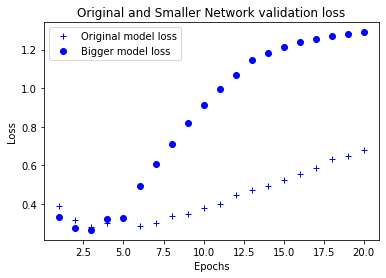

In [13]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
epochs = range(1, len(acc) + 1)
# plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values_orig, 'b+', label='Original model loss')
plt.plot(epochs, val_loss_values_big, 'bo', label='Bigger model loss')
plt.title('Original and Smaller Network validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

This Figure shows how the bigger network fares compared to the reference network.
The dots are the validation loss values of the bigger network, and the crosses are the
initial network.